In [7]:
# ----------------------------------------------------------
# IMPORT PACKAGES + SET DIRECTORY + LOAD DATA
# ----------------------------------------------------------

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np

# Set working directory
os.chdir("/Users/alexsantos/Desktop/Self Learning")

# Load data 
df = pd.read_csv("NbaPlayoffStats.csv")

#Show first rows
print(df.head())


   Rk                   Player  Age Team Pos   G  GS   MP   FG  FGA  ...  ORB  \
0   1  Shai Gilgeous-Alexander   26  OKC  PG  23  23  851  233  504  ...   23   
1   2            Jalen Brunson   28  NYK  PG  18  18  680  181  393  ...   12   
2   3           Jalen Williams   23  OKC  SG  23  23  796  178  396  ...   24   
3   4            Pascal Siakam   30  IND  PF  23  23  771  175  341  ...   30   
4   5        Tyrese Haliburton   24  IND  PG  23  23  772  146  315  ...    7   

   DRB  TRB  AST  STL  BLK  TOV  PF  PTS  Trp-Dbl  
0  100  123  150   38   20   60  65  688        0  
1   50   62  126    8    5   55  59  530        0  
2  103  127  111   32    9   41  50  492        0  
3  116  146   78   28   16   30  66  472        0  
4  116  123  197   30   15   53  39  399        1  

[5 rows x 31 columns]


In [9]:
# =====================================================================
# CLEANING + PREPPING NBA DATA
# =====================================================================


# ---------------------------
# CREATE NEEDED METRICS
# ---------------------------

# Field Goal Percentage
df["FG%"] = df["FG"] / df["FGA"]

# 3-Point Makes = 3P column
df["3PM"] = df["3P"]

# 3-Point Percentage
df["3P%"] = df["3P"] / df["3PA"].replace(0, np.nan)

# Rename TRB → REB for easier use
df["REB"] = df["TRB"]

# Assist/Turnover ratio 

# Defensive impact later uses STL + BLK

print("Columns after cleaning:")
print(df.columns)
print(df.head())

# =====================================================================
# REALITY FILTER: REMOVE LOW-MINUTE, LOW-USAGE PLAYERS
# Keeps only real rotation players so analysis is meaningful.
# =====================================================================

# Minimum games played
min_games = 10

# Minimum minutes played
min_minutes = 150    # ~7 MPG over 20 games

# Minimum field-goal attempts
min_fga = 50

df = df[
    (df["G"] >= min_games) &
    (df["MP"] >= min_minutes) &
    (df["FGA"] >= min_fga)
].copy()

print("Players remaining after filter:", len(df))



Columns after cleaning:
Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Trp-Dbl', '3PM', 'REB'],
      dtype='object')
   Rk                   Player  Age Team Pos   G  GS   MP   FG  FGA  ...  TRB  \
0   1  Shai Gilgeous-Alexander   26  OKC  PG  23  23  851  233  504  ...  123   
1   2            Jalen Brunson   28  NYK  PG  18  18  680  181  393  ...   62   
2   3           Jalen Williams   23  OKC  SG  23  23  796  178  396  ...  127   
3   4            Pascal Siakam   30  IND  PF  23  23  771  175  341  ...  146   
4   5        Tyrese Haliburton   24  IND  PG  23  23  772  146  315  ...  123   

   AST  STL  BLK  TOV  PF  PTS  Trp-Dbl  3PM  REB  
0  150   38   20   60  65  688        0   32  123  
1  126    8    5   55  59  530        0   48   62  
2  111   32    9   41  50  492        0   35  127  


In [11]:
# =====================================================================
# 1. TOP SCORERS – VOLUME LEADERS
# =====================================================================
top_scorers = df.sort_values("PTS", ascending=False).head(10)
print(top_scorers[["Player", "PTS"]])


                    Player  PTS
0  Shai Gilgeous-Alexander  688
1            Jalen Brunson  530
2           Jalen Williams  492
3            Pascal Siakam  472
4        Tyrese Haliburton  399
5       Karl-Anthony Towns  386
6          Anthony Edwards  380
7             Nikola Jokić  367
8            Chet Holmgren  349
9            Julius Randle  326


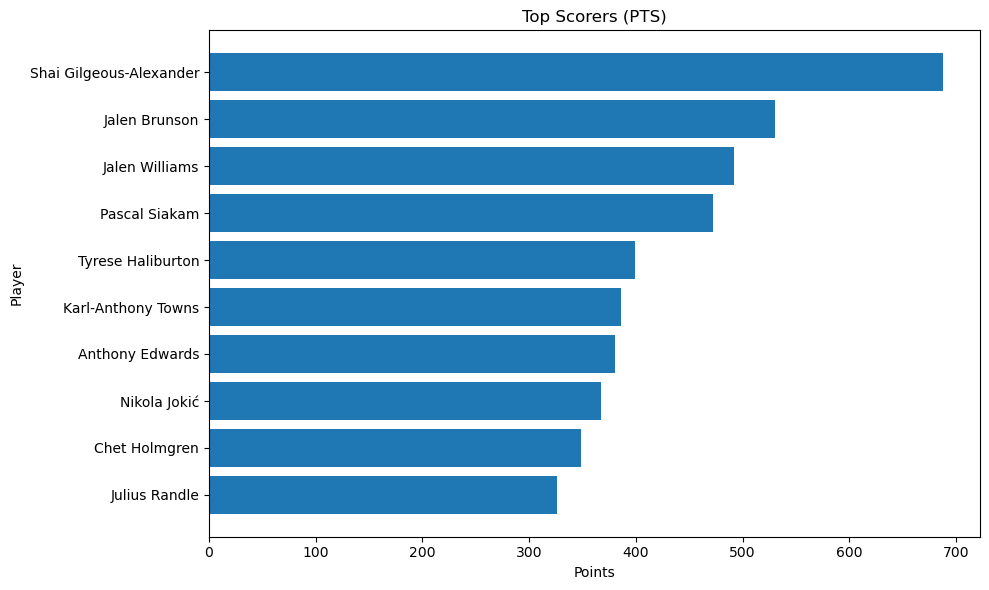

In [13]:
# =====================================================================
# 1. TOP SCORERS – HORIZONTAL BAR CHART
# =====================================================================

top_scorers = df.sort_values("PTS", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(top_scorers["Player"], top_scorers["PTS"])
plt.title("Top Scorers (PTS)")
plt.xlabel("Points")
plt.ylabel("Player")
plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()

In [15]:
# =====================================================================
# 2. MOST EFFICIENT SCORERS – FG% OR TS%
# =====================================================================

efficient_scorers = df.sort_values("FG%", ascending=False).head(10)
print(efficient_scorers[["Player", "PTS", "FG%"]])


                Player  PTS       FG%
28  Isaiah Hartenstein  186  0.619403
75   Mitchell Robinson   84  0.607843
56         Rudy Gobert  118  0.582278
22      T.J. McConnell  218  0.537143
21     Jaden McDaniels  220  0.514793
3        Pascal Siakam  472  0.513196
34            Naz Reid  156  0.509091
9        Julius Randle  326  0.502183
60          Isaiah Joe  107  0.493151
7         Nikola Jokić  367  0.488806


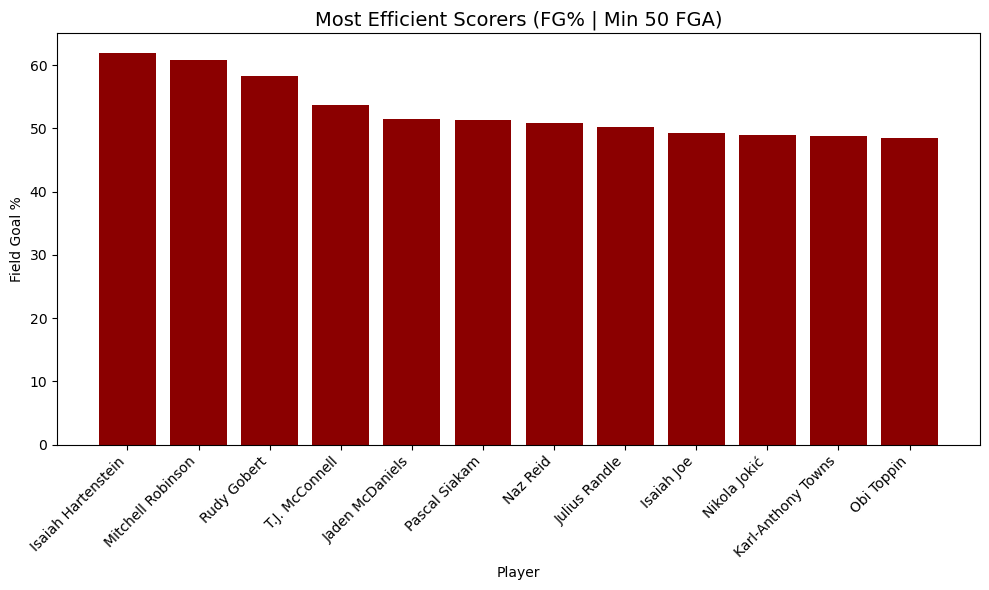

In [17]:
import matplotlib.pyplot as plt

# Filter real contributors
efficient = df[df["FGA"] >= 50].sort_values("FG%", ascending=False).head(12)

plt.figure(figsize=(10,6))

# RED bars
plt.bar(efficient["Player"].astype(str), efficient["FG%"] * 100, color="darkred")

plt.title("Most Efficient Scorers (FG% | Min 50 FGA)", fontsize=14)
plt.xlabel("Player")
plt.ylabel("Field Goal %")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [19]:
# =====================================================================
# 3. ELITE PERFORMERS – CLEAN REALISTIC VERSION
# =====================================================================

# Elite Score = Points × Field Goal Efficiency
df["EliteScore"] = df["PTS"] * df["FG%"]

elite_performers = df.sort_values("EliteScore", ascending=False).head(10)

print(
    elite_performers[["Player", "PTS", "FG%", "EliteScore"]]
    .to_string(index=False)
)

                 Player  PTS      FG%  EliteScore
Shai Gilgeous-Alexander  688 0.462302  318.063492
          Jalen Brunson  530 0.460560  244.096692
          Pascal Siakam  472 0.513196  242.228739
         Jalen Williams  492 0.449495  221.151515
     Karl-Anthony Towns  386 0.487719  188.259649
      Tyrese Haliburton  399 0.463492  184.933333
           Nikola Jokić  367 0.488806  179.391791
        Anthony Edwards  380 0.453020  172.147651
          Julius Randle  326 0.502183  163.711790
          Chet Holmgren  349 0.462406  161.379699


In [150]:
# =====================================================================
# 4. PLAYMAKERS – REALISTIC ASSIST / TURNOVER RATIO
# =====================================================================

# Filter out players with small samples to keep results realistic
filtered_df = df[
    (df["MP"] >= 150) &    # must play real minutes
    (df["G"] >= 10) &      # must play real games
    (df["AST"] >= 30)      # optional, ensures real assist volume
].copy()

# Safe AST/TO calculation (avoids division by zero)
filtered_df["AST_TO"] = filtered_df["AST"] / filtered_df["TOV"].replace(0, np.nan)

# Get top playmakers
playmakers = filtered_df.sort_values("AST_TO", ascending=False).head(10)

# Clean readable output
print(
    playmakers[["Player", "AST", "TOV", "AST_TO"]]
    .to_string(index=False)
)


                 Player  AST  TOV   AST_TO
           Jimmy Butler   57   13 4.384615
            Mike Conley   50   12 4.166667
      Tyrese Haliburton  197   53 3.716981
          Cason Wallace   48   16 3.000000
          Derrick White   39   13 3.000000
         Jalen Williams  111   41 2.707317
            Alex Caruso   51   19 2.684211
          Pascal Siakam   78   30 2.600000
        Andrew Nembhard  107   42 2.547619
Shai Gilgeous-Alexander  150   60 2.500000


In [21]:
# =====================================================================
# 5. REBOUNDERS – DOMINANCE ON THE GLASS
# =====================================================================

rebounders = df.sort_values("TRB", ascending=False).head(10)
print(rebounders[["Player", "TRB"]])


                Player  TRB
5   Karl-Anthony Towns  209
8        Chet Holmgren  199
7         Nikola Jokić  178
28  Isaiah Hartenstein  173
26           Josh Hart  158
3        Pascal Siakam  146
13       Aaron Nesmith  130
56         Rudy Gobert  129
2       Jalen Williams  127
75   Mitchell Robinson  127


In [106]:
# =====================================================================
# 6. 3-POINT SHOOTERS 
# =====================================================================

three_point_shooters = df.sort_values("3PM", ascending=False).head(10)
print(three_point_shooters[["Player", "3PM", "3P%"]])


               Player  3PM       3P%
13      Aaron Nesmith   60  0.491803
4   Tyrese Haliburton   54  0.339623
29      Luguentz Dort   48  0.342857
1       Jalen Brunson   48  0.358209
6     Anthony Edwards   46  0.353846
12         OG Anunoby   41  0.338843
27      Derrick White   40  0.384615
14    Andrew Nembhard   40  0.465116
24        Alex Caruso   37  0.411111
2      Jalen Williams   35  0.304348


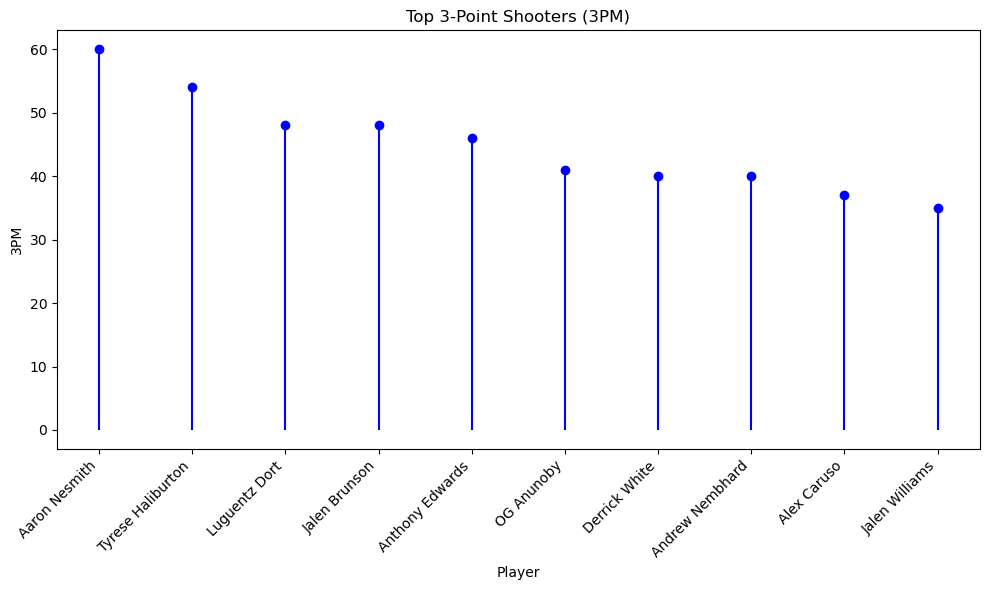

In [23]:
import matplotlib.pyplot as plt

# Make sure the 3PM column exists
df["3PM"] = df["3P"]

# Recreate the three_point DataFrame
three_point = df.sort_values("3PM", ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.stem(three_point["Player"], three_point["3PM"], linefmt='blue', markerfmt='o', basefmt=" ")
plt.title("Top 3-Point Shooters (3PM)")
plt.xlabel("Player")
plt.ylabel("3PM")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



In [25]:
# =====================================================================
# 7. DEFENSIVE IMPACT – STEALS + BLOCKS
# =====================================================================

df["DEF_IMPACT"] = df["STL"] + df["BLK"]

defenders = df.sort_values("DEF_IMPACT", ascending=False).head(10)
print(defenders[["Player", "STL", "BLK", "DEF_IMPACT"]])


                     Player  STL  BLK  DEF_IMPACT
8             Chet Holmgren   17   43          60
0   Shai Gilgeous-Alexander   38   20          58
10             Myles Turner   12   46          58
24              Alex Caruso   45   13          58
12               OG Anunoby   36   22          58
15            Mikal Bridges   30   17          47
4         Tyrese Haliburton   30   15          45
3             Pascal Siakam   28   16          44
50            Cason Wallace   32   10          42
2            Jalen Williams   32    9          41


In [31]:
# =====================================================================
# 8. ALL-AROUND PLAYERS – COMPLETE STAT INDEX
# =====================================================================

# Create weighted all-around score
df["AllAroundScore"] = (
    df["PTS"] * 0.4 +
    df["REB"] * 0.2 +
    df["AST"] * 0.25 +
    (df["STL"] + df["BLK"]) * 0.15
)

# Top 10 all-around players
all_around = df.sort_values("AllAroundScore", ascending=False).head(10)

# Clean output
print(
    all_around[["Player", "PTS", "REB", "AST", "STL", "BLK", "AllAroundScore"]]
    .to_string(index=False)
)


                 Player  PTS  REB  AST  STL  BLK  AllAroundScore
Shai Gilgeous-Alexander  688  123  150   38   20          346.00
          Jalen Brunson  530   62  126    8    5          257.85
         Jalen Williams  492  127  111   32    9          256.10
          Pascal Siakam  472  146   78   28   16          244.10
      Tyrese Haliburton  399  123  197   30   15          240.20
           Nikola Jokić  367  178  112   28   12          216.40
     Karl-Anthony Towns  386  209   24   13   12          205.95
        Anthony Edwards  380  117   82   17   11          200.10
          Chet Holmgren  349  199   22   17   43          193.90
          Julius Randle  326   88   74   12    2          168.60


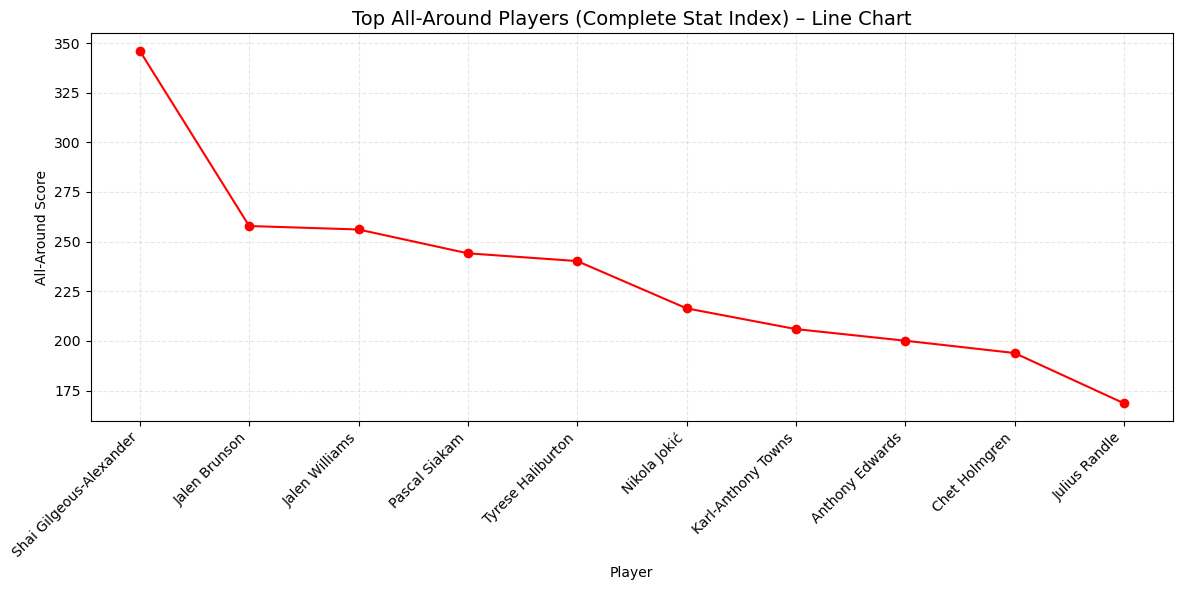

In [29]:
import matplotlib.pyplot as plt

# Make sure the AllAroundScore exists
df["AllAroundScore"] = (
    df["PTS"] * 0.4 +
    df["REB"] * 0.2 +
    df["AST"] * 0.25 +
    (df["STL"] + df["BLK"]) * 0.15
)

# Top 10 all-around players
all_around = df.sort_values("AllAroundScore", ascending=False).head(10)

# Line Chart
plt.figure(figsize=(12,6))
plt.plot(all_around["Player"], all_around["AllAroundScore"], marker='o', linestyle='-', color='red')

plt.title("Top All-Around Players (Complete Stat Index) – Line Chart", fontsize=14)
plt.xlabel("Player")
plt.ylabel("All-Around Score")
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


In [57]:
# =====================================================================
# 9. LEAGUE AVERAGES – CONTEXT
# =====================================================================

league_averages = df.mean(numeric_only=True)
print(league_averages)


Rk                100.500000
Age                26.700000
G                   8.805000
GS                  4.200000
MP                202.095000
FG                 32.690000
FGA                71.720000
FG%                 0.466366
3P                 10.450000
3PA                29.470000
3P%                 0.350057
2P                 22.240000
2PA                42.250000
2P%                 0.530186
eFG%                0.545370
FT                 15.480000
FTA                19.975000
FT%                 0.735293
ORB                 9.205000
DRB                26.385000
TRB                35.590000
AST                18.980000
STL                 6.640000
BLK                 4.155000
TOV                10.960000
PF                 17.375000
PTS                91.310000
Trp-Dbl             0.040000
3PM                10.450000
REB                35.590000
DEF_IMPACT         10.795000
AllAroundScore     50.006250
dtype: float64


In [112]:
# =====================================================================
# 10. STATISTICAL OUTLIERS – Z-SCORES
# =====================================================================

from scipy.stats import zscore

numeric_cols = df.select_dtypes(include=[np.number]).columns
df_z = df[numeric_cols].apply(zscore)

df["Outlier"] = (df_z.abs() > 2.5).any(axis=1)

outliers = df[df["Outlier"] == True][["Player"] + list(numeric_cols)]
print(outliers)


                     Player  Rk  Age   G  GS   MP   FG  FGA       FG%  3P  \
0   Shai Gilgeous-Alexander   1   26  23  23  851  233  504  0.462302  32   
4         Tyrese Haliburton   5   24  23  23  772  146  315  0.463492  54   
5        Karl-Anthony Towns   6   29  18  18  639  139  285  0.487719  26   
7              Nikola Jokić   8   29  14  14  563  131  268  0.488806  27   
8             Chet Holmgren   9   22  23  23  686  123  266  0.462406  27   
10             Myles Turner  11   28  23  23  675  106  219  0.484018  31   
13            Aaron Nesmith  14   25  23  23  650  100  212  0.471698  60   
24              Alex Caruso  25   30  23   0  562   72  160  0.450000  37   
25             Jimmy Butler  26   35  11  11  397   68  152  0.447368  11   
28       Isaiah Hartenstein  29   26  23  20  516   83  134  0.619403   0   
60               Isaiah Joe  61   25  21   0  211   36   73  0.493151  23   
67              Mike Conley  68   37  15  15  356   29   96  0.302083  20   